In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pandas as pd
import numpy as np
from heapq import merge
from scipy import interpolate

In [3]:
import pandas as pd  
df_CH1 = pd.read_csv('FSR//FSR_8//F0246CH1.csv', index_col=False, usecols=['time','voltage'])
df_CH2 = pd.read_csv('FSR//FSR_8//F0246CH2.csv', index_col=False, usecols=['time','voltage'])
print(df_CH1)
print(df_CH2)

        time  voltage
0    -0.2020    0.098
1    -0.2018    0.084
2    -0.2016    0.086
3    -0.2014    0.094
4    -0.2012    0.132
...      ...      ...
2495  0.2970    0.046
2496  0.2972    0.046
2497  0.2974    0.046
2498  0.2976    0.044
2499  0.2978    0.046

[2500 rows x 2 columns]
        time  voltage
0    -0.2020     3.64
1    -0.2018     3.64
2    -0.2016     3.68
3    -0.2014     3.68
4    -0.2012     3.68
...      ...      ...
2495  0.2970     2.72
2496  0.2972     2.72
2497  0.2974     2.72
2498  0.2976     2.72
2499  0.2978     2.72

[2500 rows x 2 columns]


In [4]:
df_CH1.plot(x = "time", y = "voltage")
df_CH2.plot(x = "time", y = "voltage")

<AxesSubplot:xlabel='time'>

In [ ]:
def get_extrema(df, n):
    df['max'] = df.iloc[argrelextrema(df.voltage.values, np.greater_equal, order=n)[0]]['voltage']
    df['min'] = df.iloc[argrelextrema(df.voltage.values, np.less_equal, order=n)[0]]['voltage']

get_extrema(df_CH1, 75)
get_extrema(df_CH2, 50)

In [6]:
def get_peak_values(df, peak_times):
    peak_values = []
    for i in peak_times: 
        peak_values.append(df.loc[df['time']== i, 'voltage'].values[0])
    return peak_values

def get_peak_times(df, extrema):
    peak_times = []
    for i in df.index:
        if not np.isnan(df[extrema].values[i]):
            peak_times.append(df["time"].values[i])
    return peak_times

def omit_repeats(time_list):
    new_time_list = []
    new_time_list.append(time_list[0])
    compared_value = time_list[0]
    for value in time_list[1:]:
        if np.abs(compared_value - value) > 0.02:
            new_time_list.append(value)
        compared_value = value
    return new_time_list

def mergeList(lst1, lst2):
    return sorted(lst1 + lst2)

def get_peak_info(df):
    df_peak_info = {}
    df_peak_info['max'] = {}
    df_peak_info['min'] = {}
    df_peak_info['extrema'] = {}
    df_peak_info["max"]['time'] = omit_repeats(get_peak_times(df, "max"))
    df_peak_info['min']['time'] = omit_repeats(get_peak_times(df, "min"))
    df_peak_info["max"]['voltage'] = get_peak_values(df, df_peak_info["max"]['time'])
    df_peak_info['min']['voltage'] = get_peak_values(df, df_peak_info["min"]['time'])
    df_peak_info['extrema']['time'] = mergeList(df_peak_info["max"]['time'], df_peak_info["min"]['time'])
    df_peak_info['extrema']['voltage'] = get_peak_values(df, df_peak_info['extrema']['time'])
    return df_peak_info

peak_info_CH1 = get_peak_info(df_CH1)
peak_info_CH2 = get_peak_info(df_CH2)

print(peak_info_CH1, peak_info_CH2)

{'max': {'time': [-0.2, -0.1654, -0.1318, -0.0802, -0.046, -0.0072, 0.0342, 0.0802, 0.1204, 0.1604, 0.1974, 0.2362, 0.284], 'voltage': [0.158, 0.146, 0.168, 0.154, 0.18, 0.148, 0.148, 0.174, 0.162, 0.16, 0.176, 0.162, 0.182]}, 'min': {'time': [-0.1752, -0.1436, -0.0964, -0.0642, -0.0332, 0.021, 0.0542, 0.0942, 0.1316, 0.168, 0.2222, 0.2548, 0.2954], 'voltage': [0.044, 0.044, 0.042, 0.042, 0.044, 0.042, 0.044, 0.044, 0.044, 0.042, 0.042, 0.042, 0.044]}, 'extrema': {'time': [-0.2, -0.1752, -0.1654, -0.1436, -0.1318, -0.0964, -0.0802, -0.0642, -0.046, -0.0332, -0.0072, 0.021, 0.0342, 0.0542, 0.0802, 0.0942, 0.1204, 0.1316, 0.1604, 0.168, 0.1974, 0.2222, 0.2362, 0.2548, 0.284, 0.2954], 'voltage': [0.158, 0.044, 0.146, 0.044, 0.168, 0.042, 0.154, 0.042, 0.18, 0.044, 0.148, 0.042, 0.148, 0.044, 0.174, 0.044, 0.162, 0.044, 0.16, 0.042, 0.176, 0.042, 0.162, 0.042, 0.182, 0.044]}} {'max': {'time': [-0.2016, -0.0278, 0.1706, 0.2966], 'voltage': [3.68, 4.16, 4.12, 2.72]}, 'min': {'time': [-0.1308

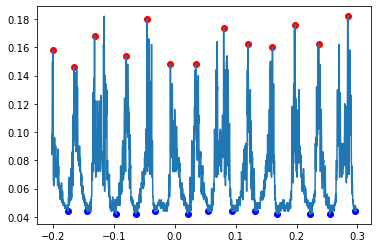

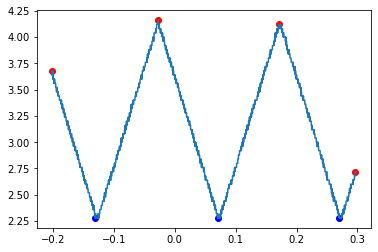

In [7]:
plt.scatter(peak_info_CH1['max']['time'], peak_info_CH1['max']['voltage'], c='r')
plt.scatter(peak_info_CH1['min']['time'], peak_info_CH1['min']['voltage'], c='b')
plt.plot(df_CH1["time"], df_CH1['voltage'])
plt.show()
plt.scatter(peak_info_CH2['max']['time'], peak_info_CH2['max']['voltage'], c='r')
plt.scatter(peak_info_CH2['min']['time'], peak_info_CH2['min']['voltage'], c='b')
plt.plot(df_CH2["time"], df_CH2['voltage'])
plt.show()

In [8]:
voltages_per_halfcycle = {}
for i in range(1, len(peak_info_CH2['extrema']['time'])):
    voltages_per_halfcycle[i] = []
    for j in peak_info_CH1['max']['time']:
        if peak_info_CH2['extrema']['time'][i-1] <= j <= peak_info_CH2['extrema']['time'][i]:
            voltage = df_CH2.loc[df_CH2['time']== j, 'voltage'].values[0]
            voltages_per_halfcycle[i].append(voltage)
print(voltages_per_halfcycle)
            

{1: [3.6, 2.96, 2.32], 2: [3.12, 3.8], 3: [3.76, 3.0], 4: [2.4, 3.16, 3.92], 5: [3.68, 2.92], 6: [2.44]}


In [9]:
voltage_diff_between_peaks = np.array([])
for voltages_dict in voltages_per_halfcycle.values():
    voltage_diff_between_peaks = np.concatenate([voltage_diff_between_peaks, np.diff(voltages_dict)])
voltage_diff_between_peaks

array([-0.64, -0.64,  0.68, -0.76,  0.76,  0.76, -0.76])

In [10]:
calculated_deltaL = np.abs(600*voltage_diff_between_peaks)

calculated_deltaL_mean = np.mean(calculated_deltaL)
calculated_deltaL_std = np.std(calculated_deltaL)

print(calculated_deltaL_mean, calculated_deltaL_std)

428.57142857142856 32.526284504589036


In [11]:
def get_min_times(max_time):
    min_info = {'left':{}, 'right':{}}
    for j in range(0, len(peak_info_CH1['extrema']['time'])):
            if peak_info_CH1['extrema']['time'][j] == max_time:
                min_info['left']['voltage'] = peak_info_CH1['extrema']['voltage'][j - 1]
                min_info['left']['time'] = peak_info_CH1['extrema']['time'][j - 1]
                min_info['right']['voltage'] = peak_info_CH1['extrema']['voltage'][j + 1]
                min_info['right']['time'] = peak_info_CH1['extrema']['time'][j + 1]
    return min_info 

def find_width_value(i):
    avg_peak_value = None
    max_time = peak_info_CH1['max']['time'][i]
    max_value = peak_info_CH1['max']['voltage'][i]
    min_info = get_min_times(max_time)
    left_min = min_info['left']['voltage']
    right_min = min_info['right']['voltage']
    avg_peak_value = ((max_value - left_min) + (max_value - right_min))/2
    width_value = 0.5*avg_peak_value + (left_min + right_min)/2
    return width_value

def get_width_value_time(left_max_time, max_time, right_max_time, width_voltage):
    interpolated_data = interpolate.interp1d(df_CH1['time'].values, df_CH1['voltage'].values)
    interval_left = np.linspace(left_max_time, max_time, 5000)
    interval_right = np.linspace(max_time, right_max_time, 5000)
    left_width_time = None
    right_width_time = None
    for x in interval_left:
        if np.abs(interpolated_data(x) - width_voltage) < 0.001:
            left_width_time = x 
            break 
    for x in np.flip(interval_right):
        if np.abs(interpolated_data(x) - width_voltage) < 0.001:
            right_width_time = x 
            break 
    width_voltage_time = np.abs(left_width_time - right_width_time)
    return width_voltage_time
            
width_times = []
for i in range(1, len(peak_info_CH1['max']['time']) - 1):
    width_voltage = find_width_value(i)
    max_time = peak_info_CH1['max']['time'][i]
    min_info = get_min_times(max_time)
    left_min_time = min_info['left']['time']
    right_min_time = min_info['right']['time']
    width_times.append(get_width_value_time(left_min_time, max_time, right_min_time, width_voltage))

calculated_width_time_mean = 600*np.mean(width_times)
calculated_width_time_std = 600*np.std(width_times)

print(calculated_width_time_mean, calculated_width_time_std)

6.674630926185237 3.178998152882671


In [12]:
calculated_deltaL/calculated_width_time_mean

array([57.5312709 , 57.5312709 , 61.12697534, 68.3183842 , 68.3183842 ,
       68.3183842 , 68.3183842 ])